In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib as mpl
cm = sns.color_palette(as_cmap=True)

## Simulation notes
For the simulation, we follow this convention:
1 time unit = 10 ms

In this simulation we add white noise, and use a new Runge-Kutta stochastic integration scheme


## Noise on input variables

In [2]:
def epileptor(q, parameters):

	x1,y1,z,x2,y2,g = q
	a1, b1, c1, d1, tau, a2, c2, m, x0, r, s, Irest1, Irest2, Is1, Is2 =\
    parameters['a1'], parameters['b1'], parameters['c1'], parameters['d1'], parameters['tau'], \
    parameters['a2'], parameters['c2'], parameters['m'], parameters['x0'], parameters['r'], \
    parameters['s'], parameters['Irest1'], parameters['Irest2'], parameters['Is1'], parameters['Is2']
    
    ###################  Population 1 #################
	if x1 < 0:
		dx1 = y1  - a1 * (x1)**3  + b1 * (x1)**2 - z + Irest1 + Is1
	else:
		dx1 = y1 + (m -x2 + 0.6 * (z-4)**2)*x1- z + Irest1 + Is1
	dy1 = c1 - d1 * (x1)**2 - y1

	################## Population 2 ################### 
	dx2 = -y2 + x2 - (x2)**3 + Irest2 + 2*g - c2*(z-3.5) + Is2
	if x2 < -0.25:
		dy2 = 1./tau * (-y2)
	else:
		dy2 = 1./tau * (-y2 + a2 * (x2 + 0.25 ))
	dg = -0.01 * (g - 0.1*x1);

	################### Energy #####################"
	dz = r* (s * (x1 - x0) -z)
	#pdb.set_trace()
	return np.hstack((dx1, dy1, dz, dx2, dy2, dg))


lx0 = [-2.2, -2.25, -2.3]
llq = []
for ix0, x0 in enumerate(lx0):
    
    print(x0)
    
    # Parameters
    parameters = {'a1':1, 'b1':3, 'c1':1, 'd1':5,
                  'tau':10, 'a2':6, 'c2':0.3, 'm':0,
                  'x0':x0, 'r':0.00005, 's':4,
                  'Irest1':3.1, 'Irest2':0.45, 'Is1':0, 'Is2':0,
                  'sigma1': 0.005, 'sigma2': 0.0004} # sigma is noise std

    
    # Find initial conditions by root solving
    # q = [-1.96, -18.30,  3.89, -1.03,  0., -0.19]
    q = np.array([[ -1.46, -9.69, 2.95, -0.74, -0.033, -0.15],
               [ -1.51, -10.32, 2.98, -0.77, -0.04, -0.15],
               [ -1.55, -10.95, 3.02, -0.80, 0.022, -0.15]])[ix0]

    # sim parameters
    dt = 0.001
    t_sim_init = 0
    n_samples_init = int(t_sim_init/dt)
    t_sim = 40000
    n_samples = int(t_sim/dt)
    upsamp = 10
    t = np.linspace(0, t_sim, t_sim*upsamp)

    for it in range(n_samples_init):
        # new RK stochastic: https://arxiv-export3.library.cornell.edu/pdf/1210.0933v1
        sk = np.random.choice([-1, 1])
        dwk = np.random.normal()
        sk = np.random.choice([-1, 1])
        dwk1, dwk2, dwk3 = np.random.normal(), np.random.normal(), np.random.normal()
        p1 = dt*epileptor(q, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        p2 = dt*epileptor(q+p1, parameters) + [(dwk1 - sk * np.sqrt(dt))*parameters['sigma1'], 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        q += (p1 + p2)/2

        if it%int(1000/dt)==0:
            print(it)
            
    lq = []
    for it in range(n_samples):
        # if it%10000==0:
        #     print(it)
        tc = it*dt
        # new RK stochastic: https://arxiv-export3.library.cornell.edu/pdf/1210.0933v1
        sk = np.random.choice([-1, 1])
        dwk1, dwk2, dwk3 = np.random.normal(), np.random.normal(), np.random.normal()
        p1 = dt*epileptor(q, parameters) + [0, 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        p2 = dt*epileptor(q+p1, parameters) + [0, 0, 0, (dwk2 - sk * np.sqrt(dt))*parameters['sigma2'], (dwk3 - sk * np.sqrt(dt))*parameters['sigma2'], 0]
        q += (p1 + p2)/2

        if it%int(1/(upsamp*dt))==0:
            lq.append(q.copy())
            
        if it%int(1000/dt)==0:
            print(it)
            
    llq.append(lq)
llq = np.array(llq)

-2.2
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
-2.25
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
-2.3
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
340000

In [3]:
np.array(lq).shape

(400000, 6)

In [4]:
np.mean(llq[:, 17500:18000], 1)

array([[-1.46216865e+00, -9.68968432e+00,  2.95015201e+00,
        -7.23513250e-01, -2.12109659e-02, -1.46215771e-01],
       [-1.50599735e+00, -1.03401436e+01,  2.97958445e+00,
        -7.72061494e-01, -5.76761953e-03, -1.50602113e-01],
       [-1.54939198e+00, -1.10030898e+01,  3.01825035e+00,
        -7.97324888e-01, -6.04722547e-03, -1.54947304e-01]])

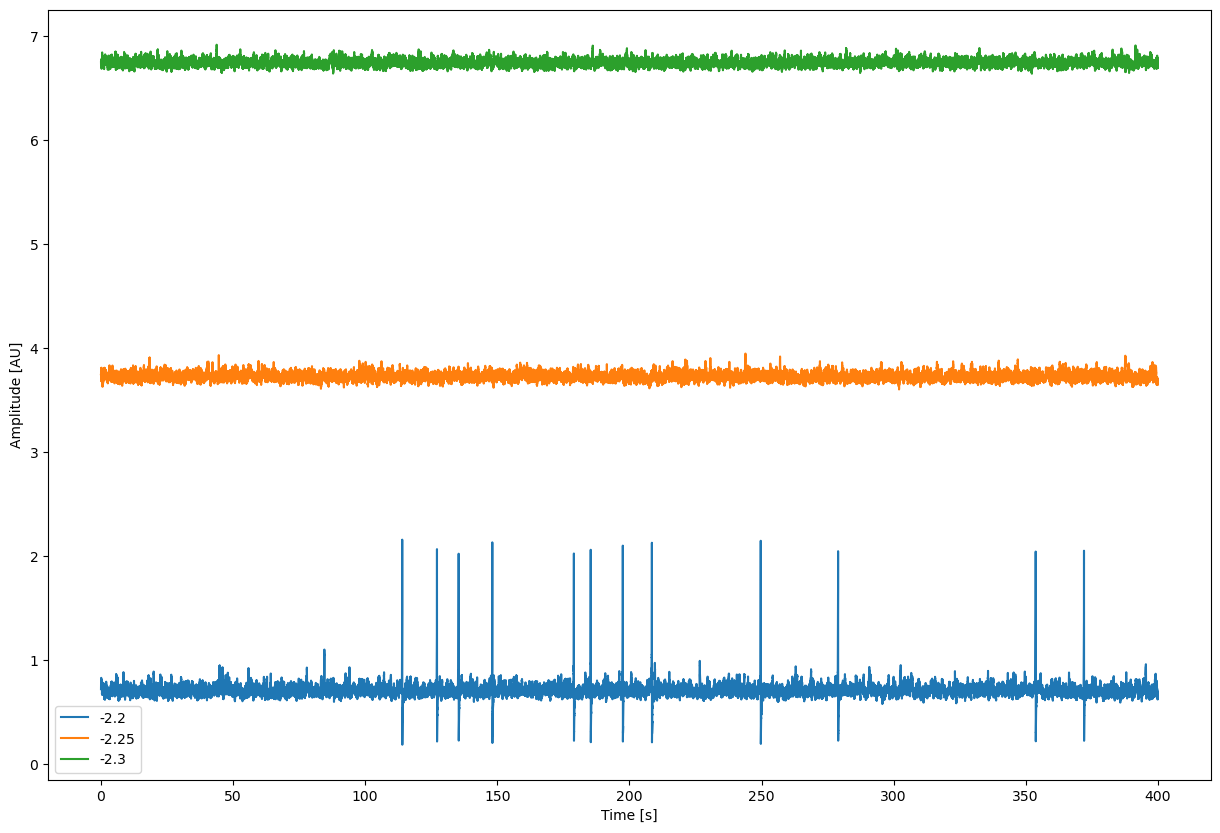

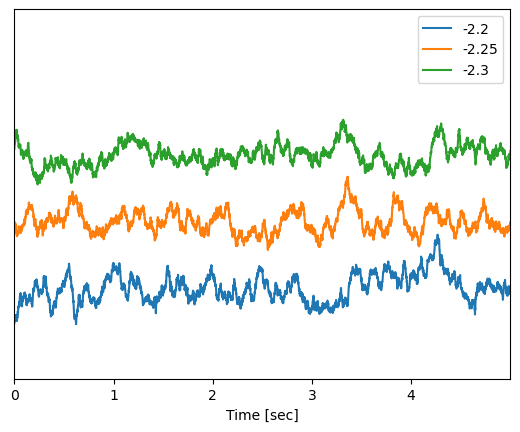

In [5]:
ts = -llq[:, :, 0] + llq[:, :, 3]
plt.figure(figsize=(15, 10))
for ix0 in range(len(lx0)):
    plt.plot(t/100, ts[ix0] + ix0*3, color=cm[ix0], label=lx0[ix0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [AU]')
plt.legend()
plt.savefig('figures/time_series_passive_markers.svg')

plt.figure()
for ix0 in range(len(lx0)):
    plt.plot(t/100, llq[ix0, :, 3] + ix0*.2, color=cm[ix0], label=lx0[ix0])
plt.xlim([250, 255])
plt.ylim([-1, 0.])
plt.xticks(range(250, 255), range(5)) 
plt.yticks([])
plt.xlabel('Time [sec]')
plt.legend()
plt.savefig('figures/time_series_passive_markers_pop2.svg')

### Compute the markers

In [30]:
from scipy import stats
from statsmodels.tsa.stattools import acf

tstart = int(50*100*upsamp)
tend = int(400*100*upsamp)
window = int(4*100*upsamp)
freq_range = [1, 10]
repslvar, repslskewness, repsllag_half, repslsum_LL, repslcorr = [], [], [], [], []
for ix0 in range(len(lx0)):
    ts = -llq[ix0, :, 0] + llq[ix0, :, 3]
    lvar, lskewness, llag_half, lsum_LL, lcorr = [], [], [], [], []
    for it in np.arange(tstart, tend-window, int(window/10)):
        # skip window if there is a spike in any of the three time series
        if not np.any(llq[:, it:it+window, 3]>-.5) and not np.any(llq[:, it:it+window, 3]<-0.95):
            # print(it)
            # Variance
            lvar.append(np.var(ts[it:it+window]))
            # skewness
            lskewness.append(np.abs(stats.skew(ts[it:it+window], bias=False)))
            # lskewness.append(stats.skew(ts[it:it+window], bias=False))
            # autocorr (half-max autocorr function) 
            nlags = len(ts[it:it+window])/2
            autocorr = acf(ts[it:it+window], nlags=nlags, fft=True)
            lcorr.append(autocorr)
            llag_half.append(np.min(np.argwhere(autocorr < 0.5)))
            # Line-length 
            lsum_LL.append(np.sum(np.abs(np.diff(ts[it:it+window]))) / window )
    repslvar.append(lvar)
    repslskewness.append(lskewness)
    repslcorr.append(lcorr)
    repsllag_half.append(llag_half)
    repslsum_LL.append(lsum_LL)
repslvar = np.array(repslvar)
repslskewness = np.array(repslskewness)
repslcorr = np.array(repslcorr)
repsllag_half = np.array(repsllag_half)
repslsum_LL = np.array(repslsum_LL)

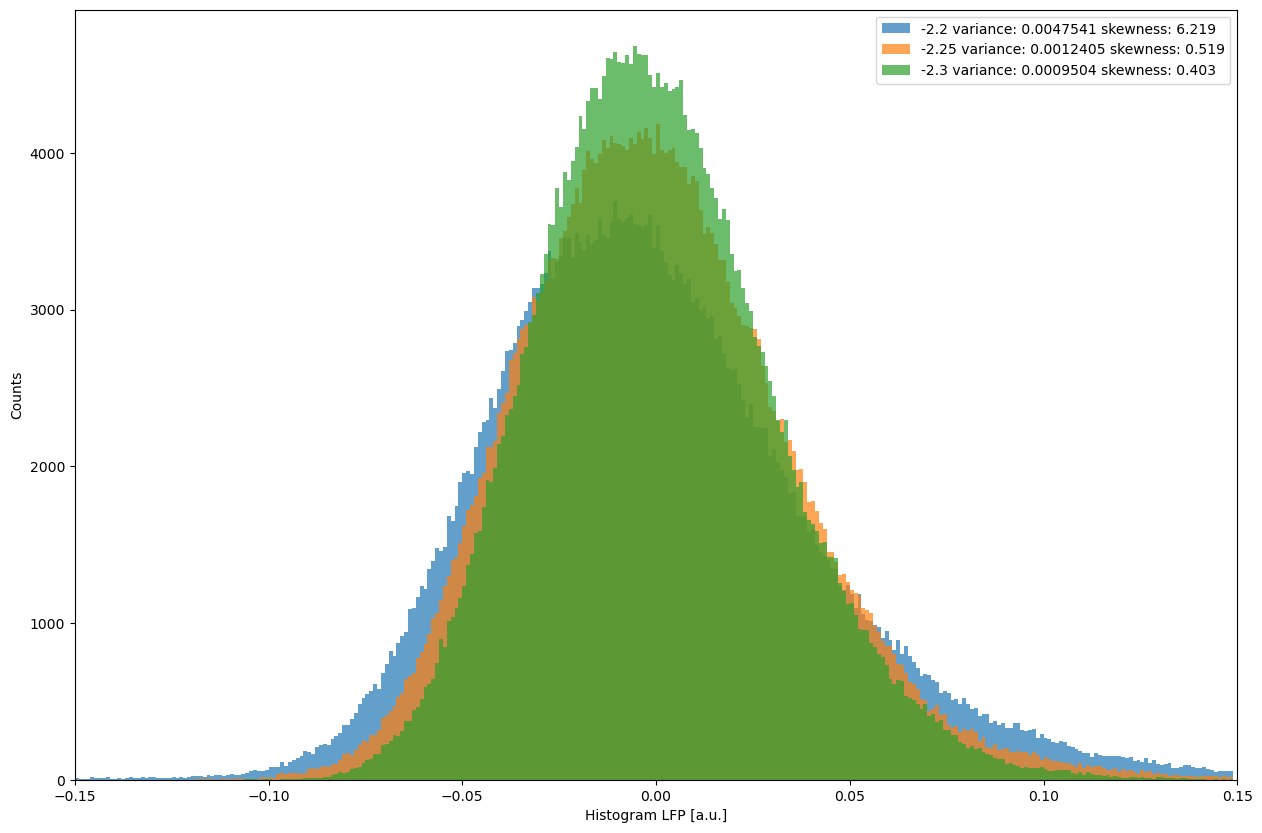

In [31]:
plt.figure(figsize=(15, 10))
tstart = int(50*100*upsamp)
tend = int(400*100*upsamp)
for ix0, x0 in enumerate(lx0):
    ts = -llq[ix0, tstart:tend, 0] + llq[ix0, tstart:tend, 3]
    ts = ts - np.mean(ts)
    legend = str(lx0[ix0]) + ' variance: ' + str(np.round(np.var(ts), 7)) + ' skewness: ' + str(np.round(stats.skew(ts), 3))
    plt.hist(ts, color=cm[ix0], alpha=0.7, bins=np.arange(-0.15, 0.15, 0.001), label=legend)
plt.ylabel('Counts')
plt.xlabel('Histogram LFP [a.u.]')
plt.xlim([-0.15, 0.15])
plt.legend()
plt.savefig('figures/histogram_variance_skewness_passive_marker.svg')

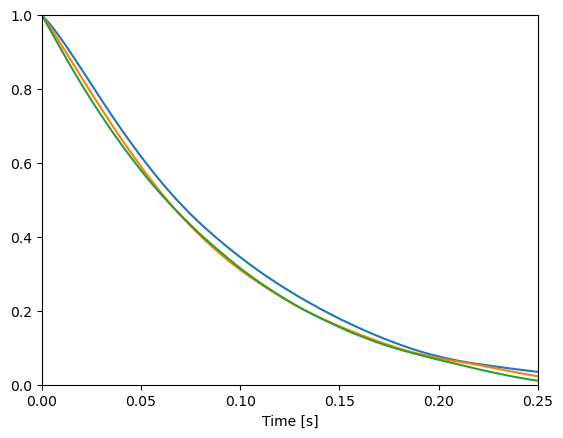

In [32]:
plt.figure()
for ix0, lcorr in enumerate(repslcorr):
    avg_corr = np.mean(lcorr, 0)
    plt.plot(np.arange(0, 2.001, 0.001), avg_corr, color=cm[ix0])
plt.xlabel('Time [s]')
plt.xlim([0, 0.25])
plt.ylim([0., 1])
plt.savefig('figures/autocorrelation_passive_marker.svg')

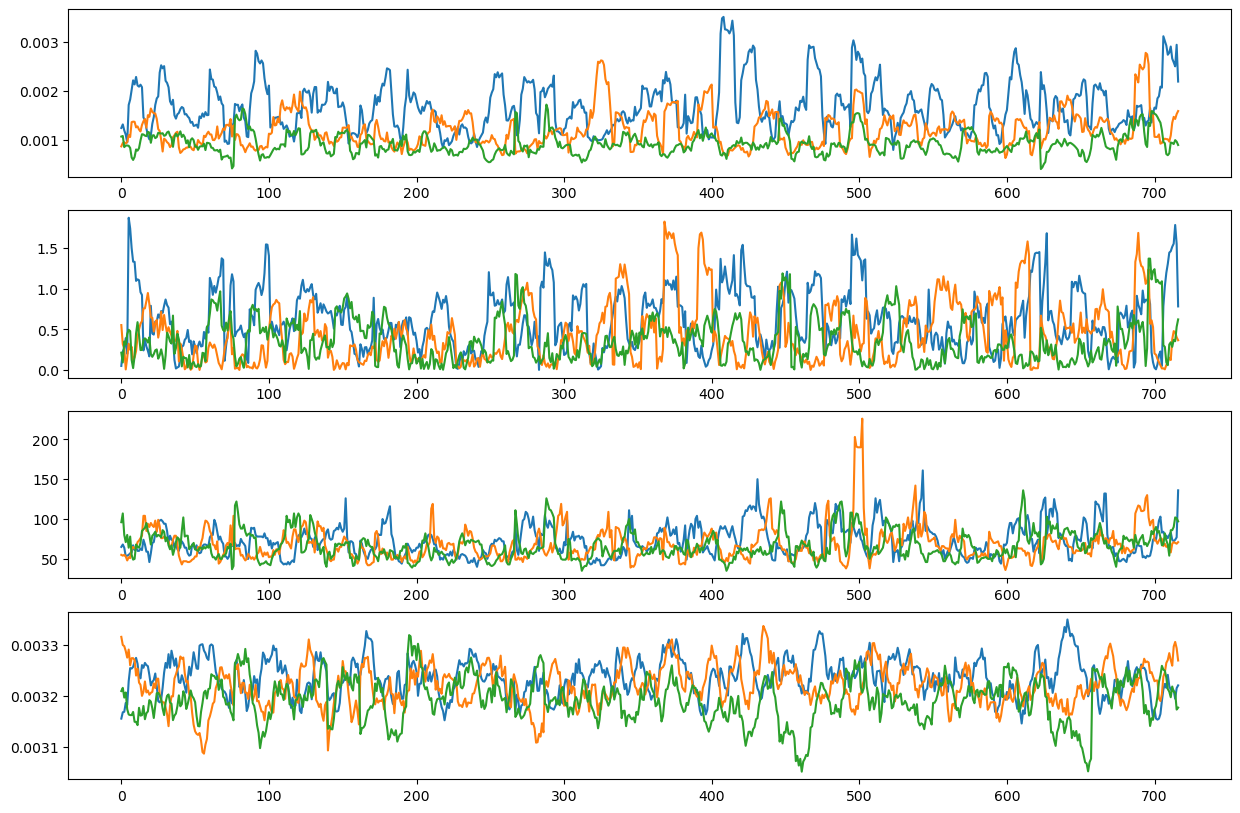

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(repslvar.T)
plt.subplot(412)
plt.plot(repslskewness.T)
plt.subplot(413)
plt.plot(repsllag_half.T)
plt.subplot(414)
plt.plot(repslsum_LL.T)
plt.savefig('figures/passive_markers_non_epileptogenic_diff_exc.svg')

In [34]:
repslvar, repslskewness, repsllag_half, repslsum_LL
import pandas as pd
df1 = pd.DataFrame(repslvar.T, columns=lx0)
df1['Measure'] = 'Variance'
df1 = pd.melt(df1, id_vars=['Measure'])
df2 = pd.DataFrame(repslskewness.T, columns=lx0)
df2['Measure'] = 'Skewness'
df2 = pd.melt(df2, id_vars=['Measure'])
df3 = pd.DataFrame(repsllag_half.T, columns=lx0)
df3['Measure'] = 'Autocorrelation'
df3 = pd.melt(df3, id_vars=['Measure'])
df4 = pd.DataFrame(repslsum_LL.T, columns=lx0)
df4['Measure'] = 'Line length'
df4 = pd.melt(df4, id_vars=['Measure'])

In [35]:
df1

,Measure,variable,value
0,Variance,-2.2,0.001240
1,Variance,-2.2,0.001312
2,Variance,-2.2,0.001189
3,Variance,-2.2,0.001103
4,Variance,-2.2,0.000946
...,...,...,...
2146,Variance,-2.3,0.000934
2147,Variance,-2.3,0.000911
2148,Variance,-2.3,0.000991
2149,Variance,-2.3,0.000959


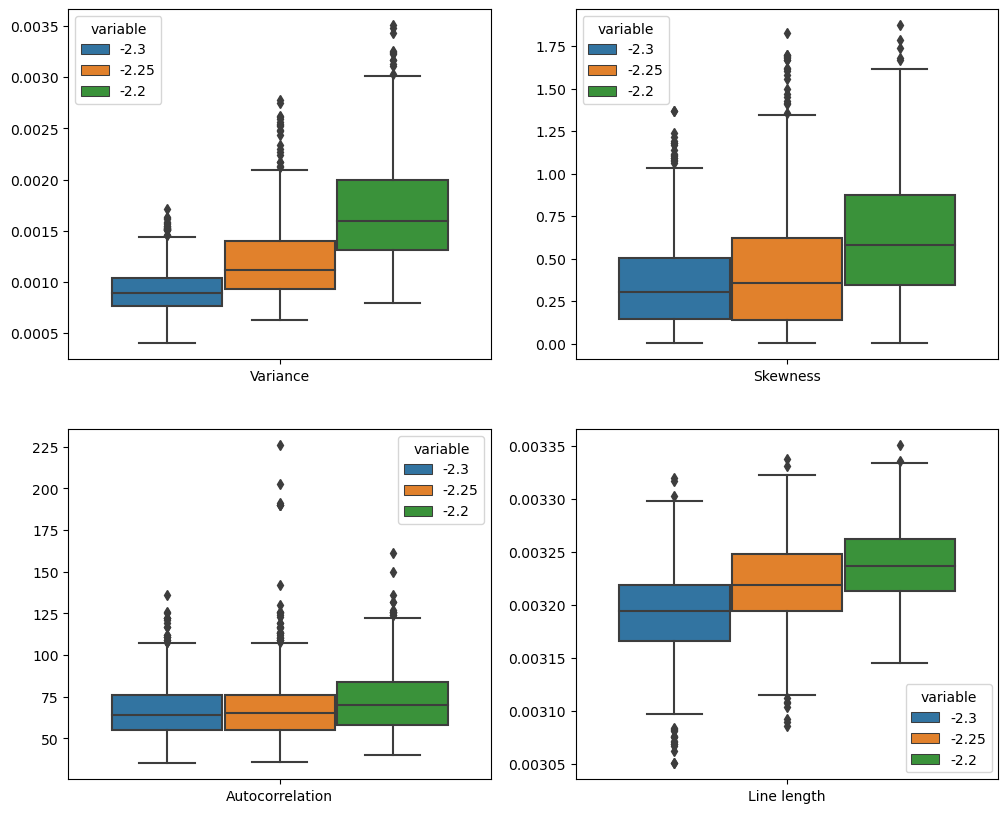

In [36]:
import seaborn as sns
plt.figure(figsize=(12, 10))
ax1 = plt.subplot(221)
sns.boxplot(data=df1, x='Measure', y='value', hue='variable', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2 = plt.subplot(222)
sns.boxplot(data=df2, x='Measure', y='value', hue='variable', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3 = plt.subplot(223)
sns.boxplot(data=df3, x='Measure', y='value', hue='variable', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax4 = plt.subplot(224)
sns.boxplot(data=df4, x='Measure', y='value', hue='variable', ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('')
plt.savefig('figures/passsive_markers_boxplot_all_variables_noise.svg')

In [15]:
df1.to_pickle('results/variance.pkl')  
df2.to_pickle('results/skewness.pkl')  
df3.to_pickle('results/autocorrelation.pkl')  
df4.to_pickle('results/line_length.pkl')  